In [12]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



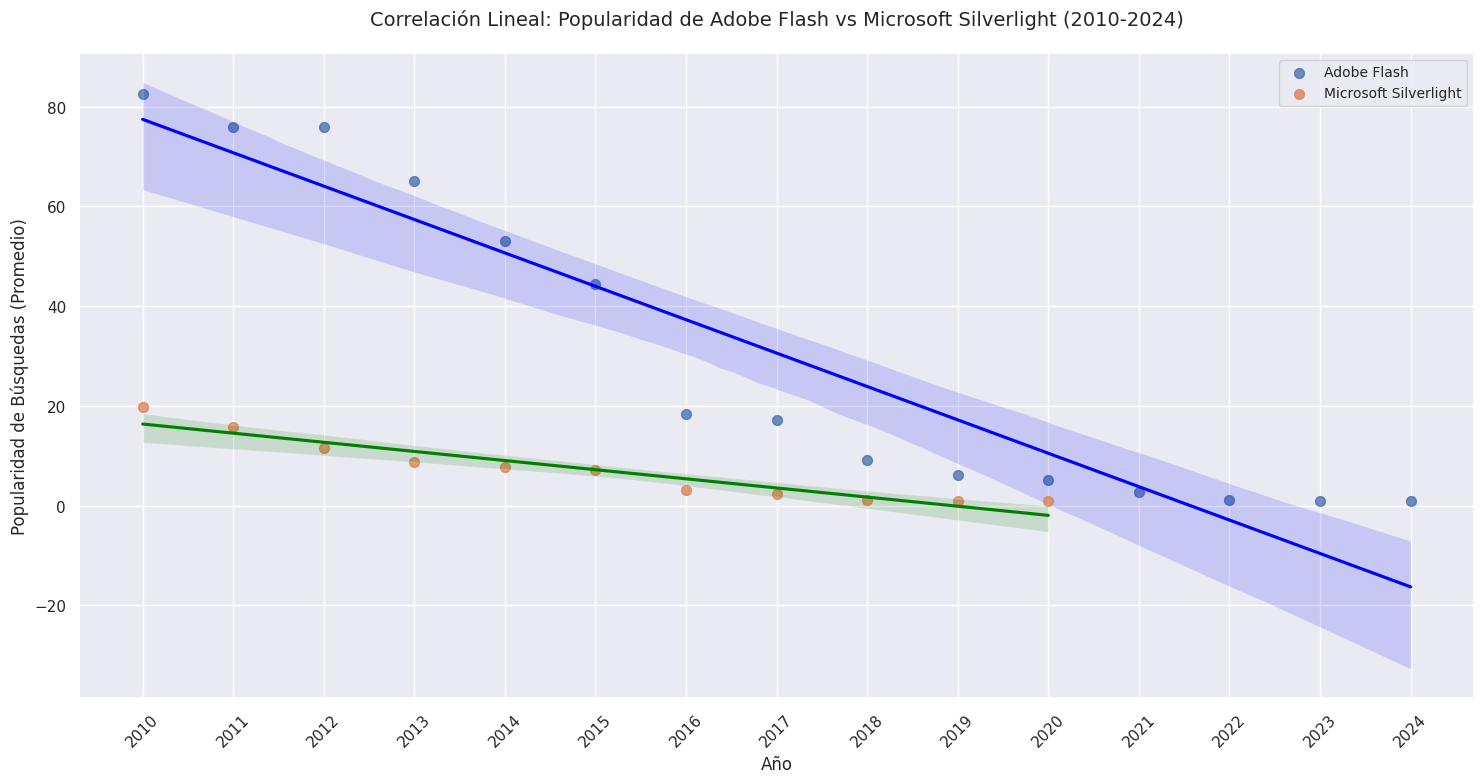


Correlación entre Adobe Flash y Microsoft Silverlight: 0.94


In [13]:

# Configurar el estilo de Seaborn
sns.set_theme(style="darkgrid")

# Cargar el archivo Excel
data_excel = pd.read_excel('/content/graficos/multiTimeline-_4_.xlsx')

# Convertir la columna 'Mes' a tipo datetime
data_excel['Mes'] = pd.to_datetime(data_excel['Mes'])

# Convertir las columnas de popularidad a tipo numérico, si no lo son
cols_to_convert = ['Adobe Flash: (Todo el mundo)', 'Microsoft Silverlight: (Todo el mundo)']
data_excel[cols_to_convert] = data_excel[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Extraer el año y agregarlo como una nueva columna
data_excel['Año'] = data_excel['Mes'].dt.year

# Agrupar los datos por año y calcular el promedio anual
data_excel_grouped = data_excel.groupby('Año').mean().reset_index()

# Crear el gráfico de correlación lineal
plt.figure(figsize=(15, 8))

# Gráfico para Adobe Flash
sns.regplot(
    x=data_excel_grouped['Año'],
    y=data_excel_grouped['Adobe Flash: (Todo el mundo)'],
    label='Adobe Flash',
    scatter_kws={'s': 50},  # Tamaño de los puntos
    line_kws={'color': 'blue'},  # Color de la línea
)

# Gráfico para Microsoft Silverlight
sns.regplot(
    x=data_excel_grouped['Año'],
    y=data_excel_grouped['Microsoft Silverlight: (Todo el mundo)'],
    label='Microsoft Silverlight',
    scatter_kws={'s': 50},
    line_kws={'color': 'green'},
)

# Configurar el gráfico
plt.title('Correlación Lineal: Popularidad de Adobe Flash vs Microsoft Silverlight (2010-2024)',
          fontsize=14, pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Popularidad de Búsquedas (Promedio)', fontsize=12)
plt.legend(fontsize=10)
plt.xticks(data_excel_grouped['Año'], rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Calcular la correlación entre las dos columnas
correlation = data_excel_grouped['Adobe Flash: (Todo el mundo)'].corr(
    data_excel_grouped['Microsoft Silverlight: (Todo el mundo)']
)
print(f"\nCorrelación entre Adobe Flash y Microsoft Silverlight: {correlation:.2f}")
